<a href="https://colab.research.google.com/github/nabilazy/BK_DataScience/blob/main/BK24_A11_2020_12530_Nabila_Zibriza_Farsya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Daftar Isi
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangun Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)


## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>

In [1]:
# Load library yang diperlukan
import pandas as pd
import numpy as np

In [2]:
# Load data menjadi data frame
dir = '/content/drive/MyDrive/Ujian Sertifikasi BK/breast+cancer+wisconsin+original/breast-cancer-wisconsin.data'
dataset = pd.read_csv(dir, header=None)

In [3]:
# menampilkan data
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# Memasukkan nama fitur kedalam dataset
dataset.columns=['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
                 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size',
                 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

In [5]:
# Lakukan pengecekan apakah dataset sudah benar dengan menampilkan 5 data teratas
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [6]:
# Menampilkan informasi dari file dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
# Menampilkan deskripsi dari file dataset
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

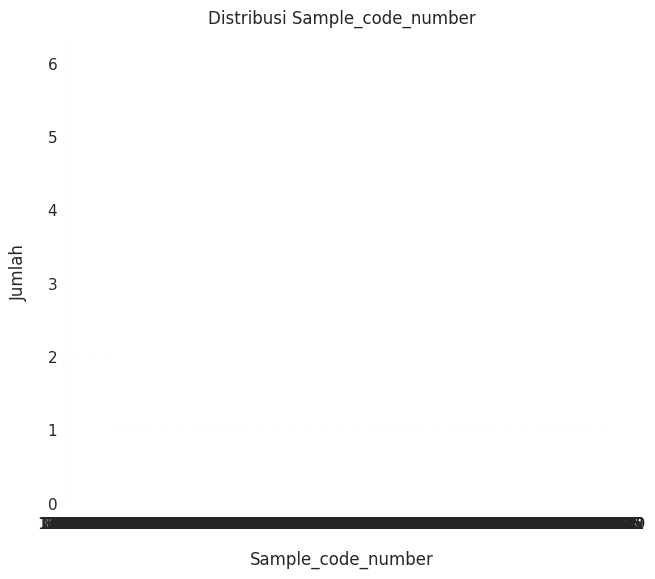

In [9]:
# dibawah adalah contoh kode program untuk fitur 1
sns.set(font_scale=1.0)
dataset['Sample_code_number'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number", y=1.02);

### Isi Koding 1

In [10]:
# tuliskan kode program untuk Menampilkan distribusi kelas dari semua fitur
col_names = list(dataset.columns)
col_names

['Sample_code_number',
 'Clump_thickness',
 'Uniformity_of_cell_size',
 'Uniformity_of_cell_shape',
 'Marginal_adhesion',
 'Single_epithelial_cell_size',
 'Bare_nuclei',
 'Bland_chromatin',
 'Normal_nucleoli',
 'Mitoses',
 'Class']

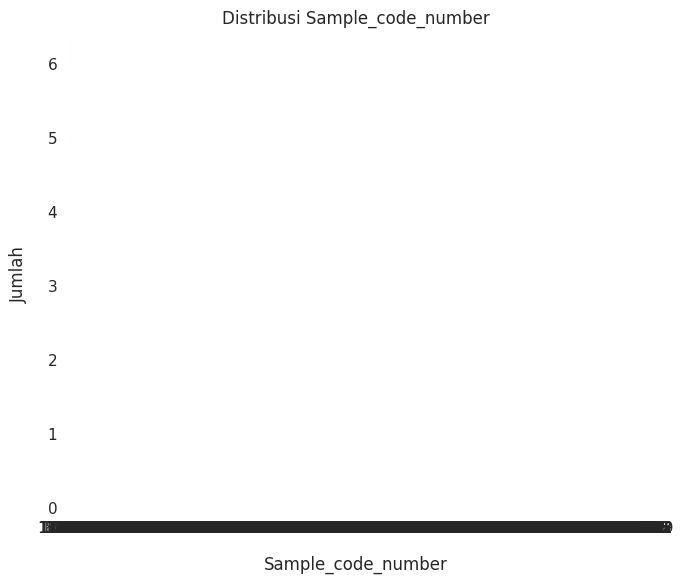

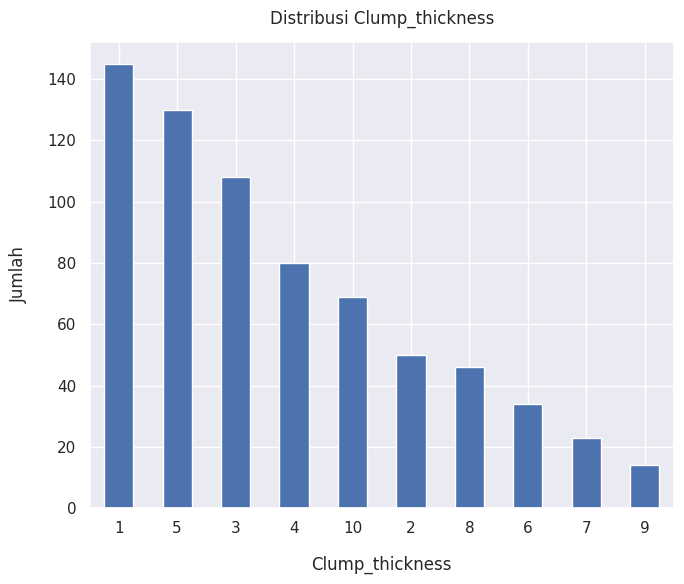

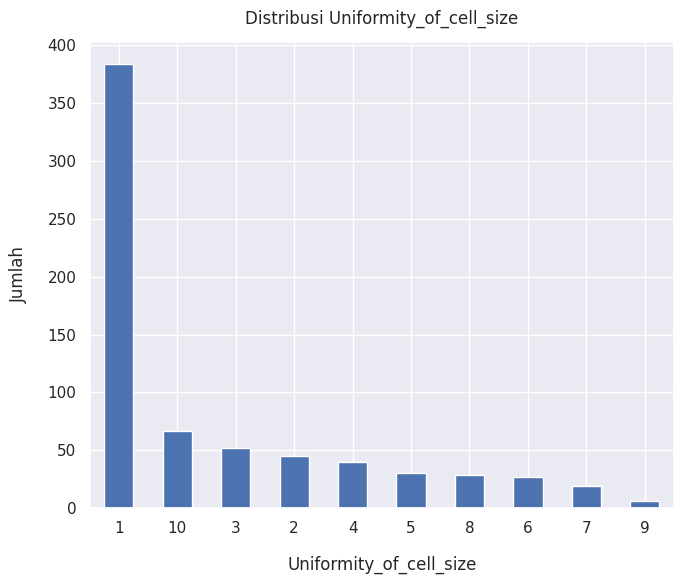

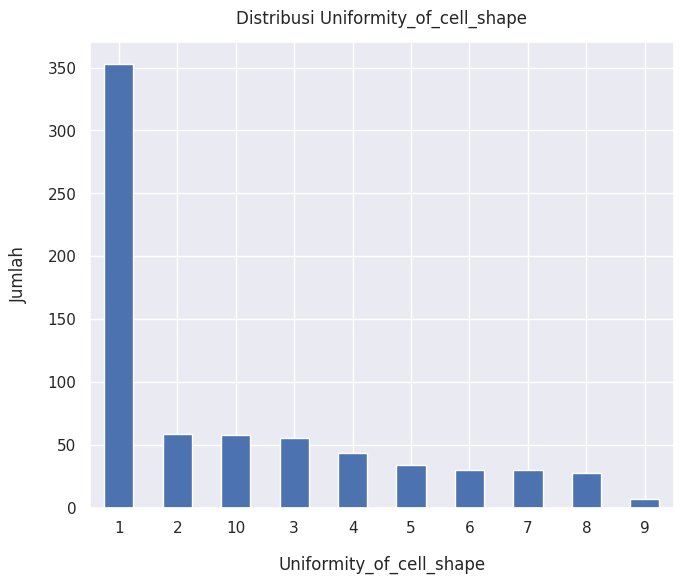

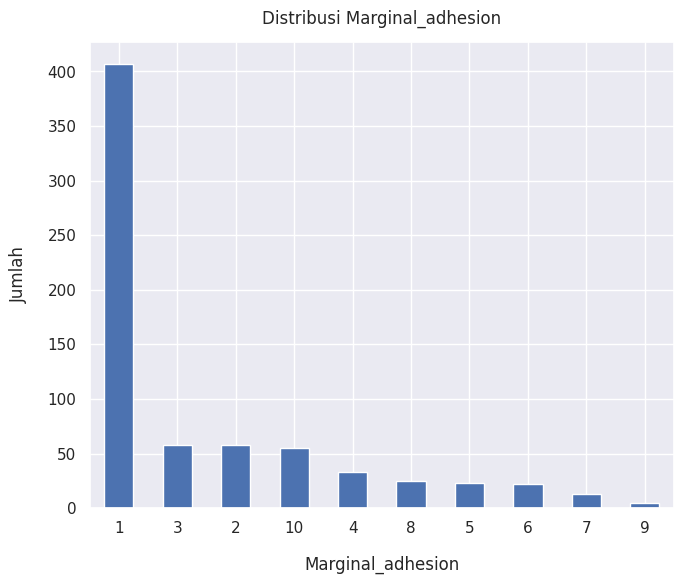

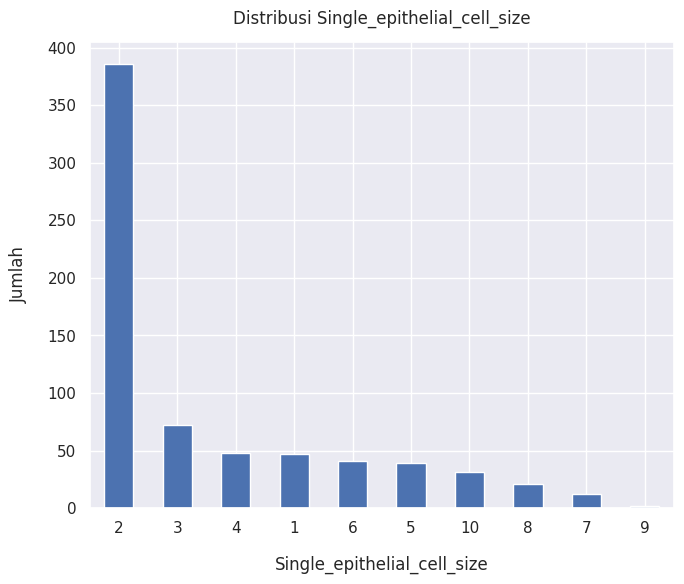

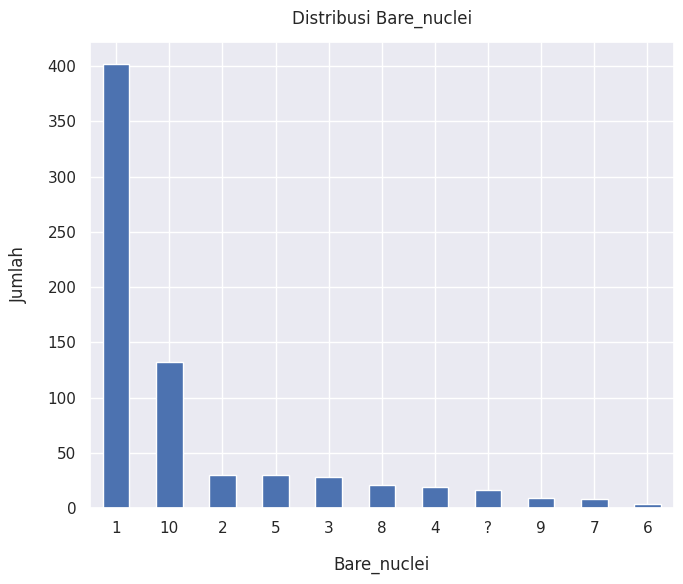

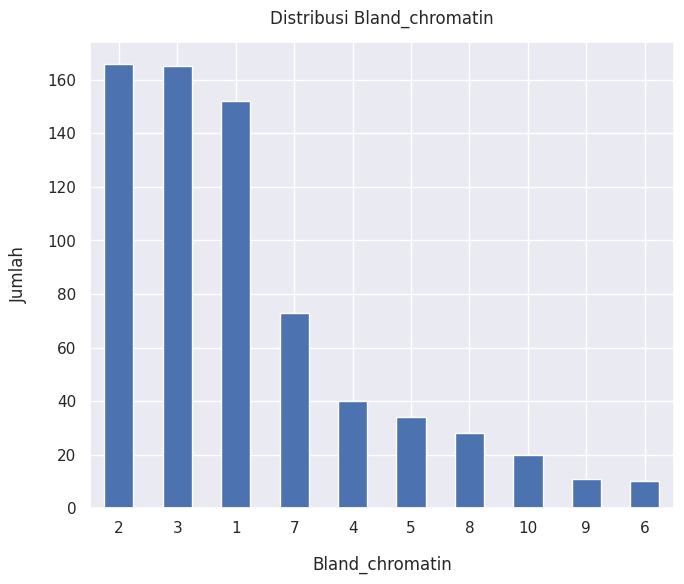

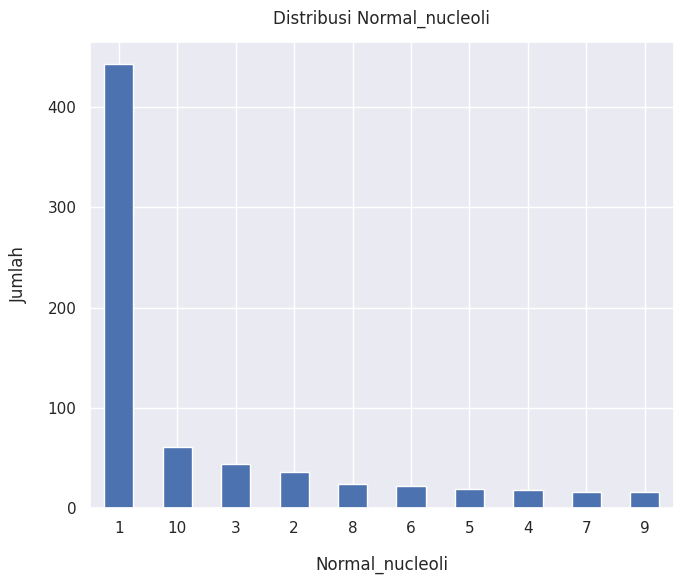

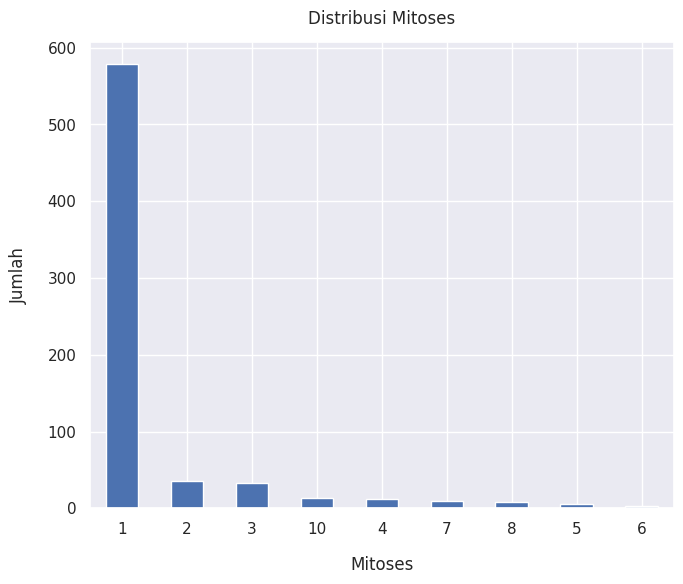

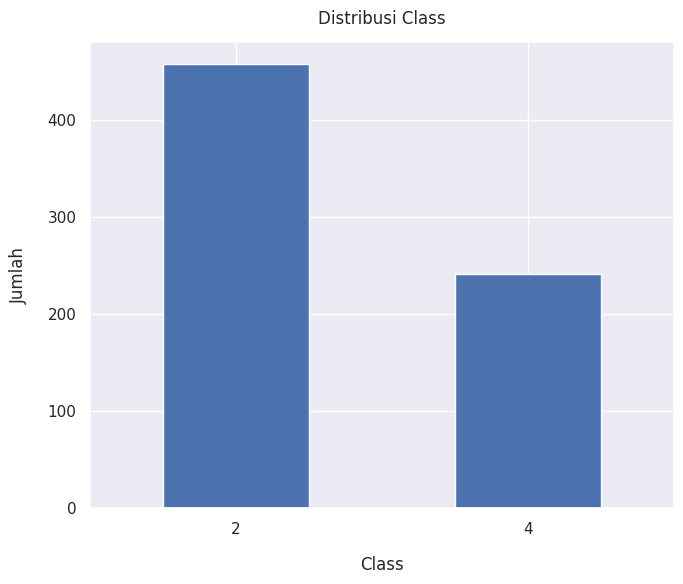

In [11]:
for col in col_names:
  sns.set(font_scale=1.0)
  dataset[col].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
  plt.xlabel(col, labelpad=14)
  plt.ylabel("Jumlah", labelpad=14)
  plt.title(f"Distribusi {col}", y=1.02)
  plt.tight_layout()
  plt.show()

## 3) Memvalidasi Data <a class="anchor" id="h3"></a>

Dalam aktivitas ini, Anda harus dapat melakukan pengecekan atas data yang Anda gunakan apakah terdapat missing value, noisy data, atau data yang tidak sesuai lainnya

In [12]:
# mengecek missing values
dataset.isnull().sum()

Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [13]:
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


###Essay 1
Deskripsikan Temuan Anda disini:
Yang dapat ditemukan dari tahap validasi data adalah
1. Semua fitur tidak ada yang memiliki missing values
2. Fitur Bare_nuclei memiliki data type object, padahal jika sesuai dengan dokumentasi dataset, tipe datanya harusnya integer. Lalu, fitur ini memiliki satu kelas ?, yang mana bukan merupakan integer sehingga nanti harus direplace.
3. Fitur Sample_code_number memiliki data type integer, padahal jika sesuai dengan dokumentasi dataset, tipe datanya harusnya categorical.


## 4) Menentukan Objek Data <a class="anchor" id="h4"></a>

In [15]:
import numpy as np

In [16]:
#menghapus fitur yang tidak dapat digunakan
columns_to_drop = ['Sample_code_number']
dataset = dataset.drop(columns_to_drop, axis=1)

In [17]:
#menggantikan nilai yang salah pada data
dataset.replace("?", np.nan, inplace= True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  683 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


###Essay 2
Deskripsikan Temuan Anda disini:
1. Setelah dilakukan penggantian nilai '?' pada fitur Bare_nuclei menjadi NaN, missing values pun ditemukan pada fitur Bare_nuclei.

## 5) Membersihkan Data <a class="anchor" id="h5"></a>

In [19]:
# menghitung nilai Null pada dataset
dataset.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [20]:
# mendeteksi keberadaan nilai Null
dataset.loc[:, dataset.isnull().any()].columns

Index(['Bare_nuclei'], dtype='object')

In [21]:
# Menampilkan Informasi dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  683 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [22]:
import missingno

<Axes: >

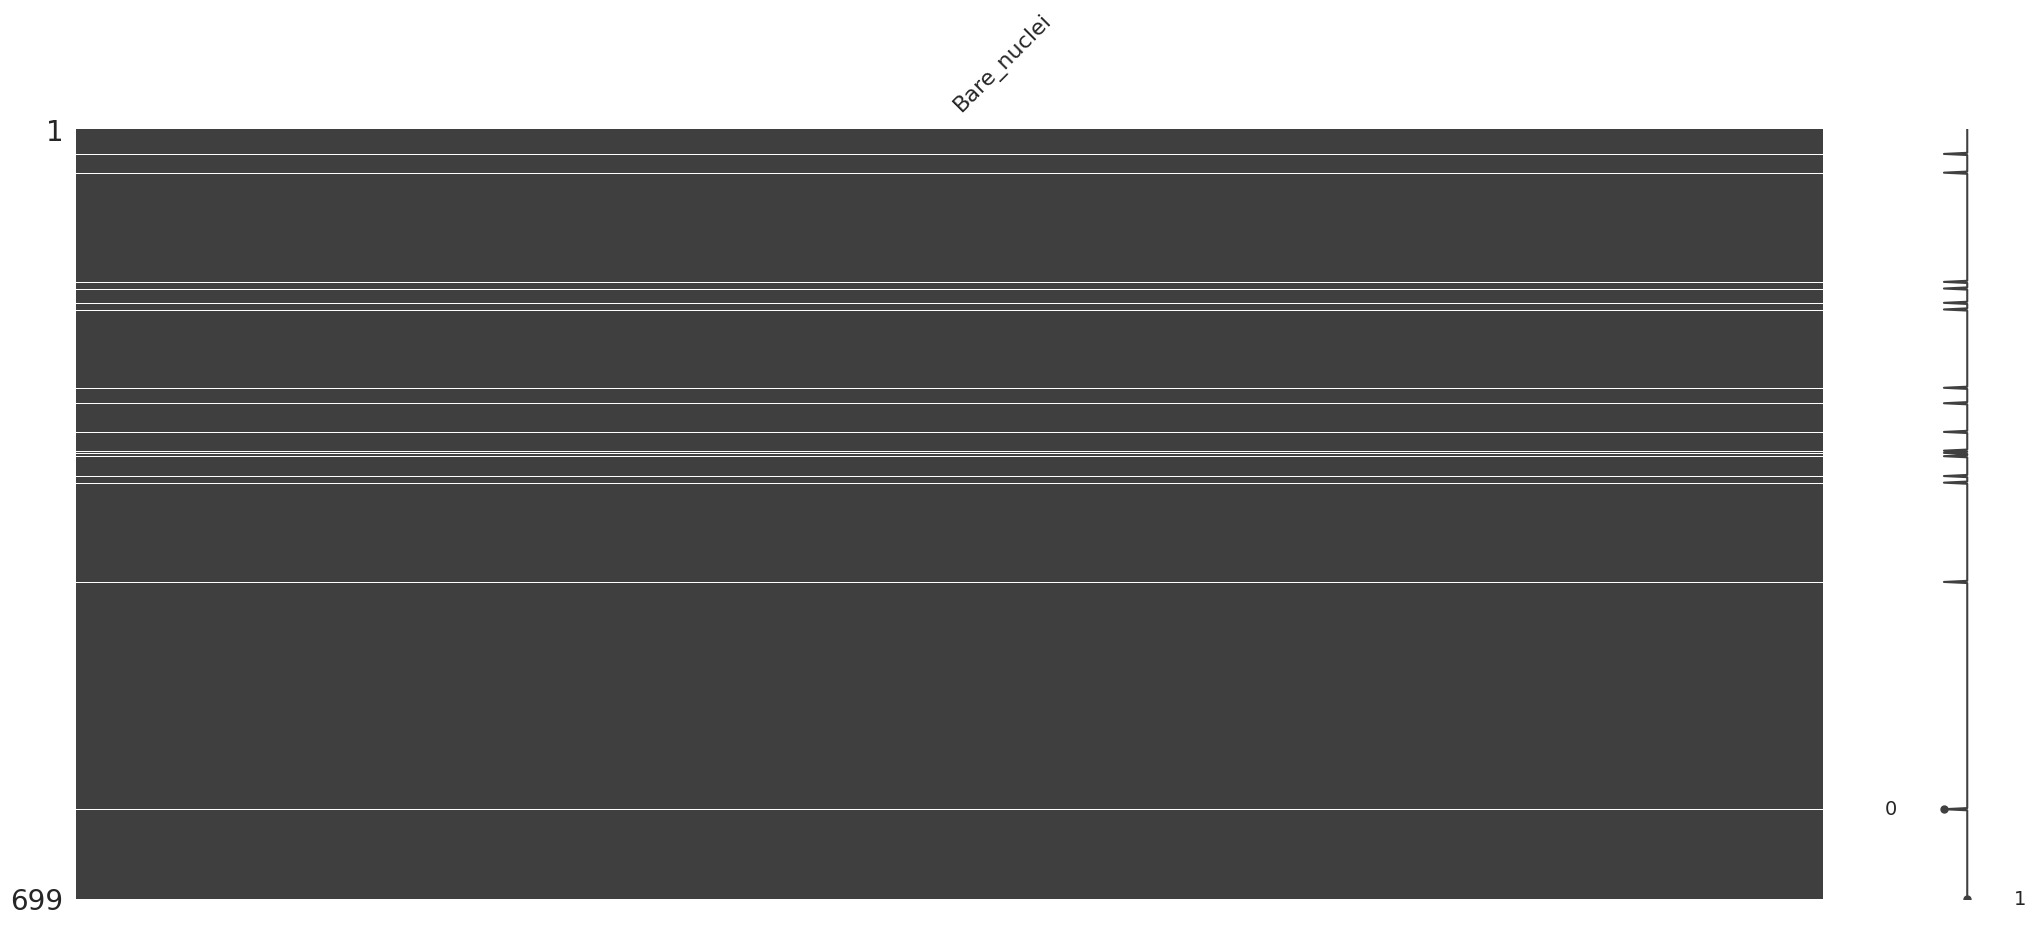

In [23]:
# Memvisualisasikan keberadaan nilai Null
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [44]:
# hapus fitur jika fitur yang hilang lebih dari 50%
num_row = dataset.shape[0]
threshold = 0.5 * num_row
count_nan = dataset['Bare_nuclei'].isnull().sum()
if count_nan > threshold:
 dataset.drop(['Bare_nuclei'], axis="columns", inplace=True)
else:
 median_value=dataset['Bare_nuclei'].dropna()
 median_value=median_value.astype(float)
 median_value=round(median_value.median())
 print(median_value)
 dataset['Bare_nuclei'] = dataset['Bare_nuclei'].fillna(median_value)

1


In [45]:
dataset

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [46]:
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [47]:
# Mengubah Type data dari salah satu fitur
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].astype(str).astype(int)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_of_cell_size      699 non-null    int64
 2   Uniformity_of_cell_shape     699 non-null    int64
 3   Marginal_adhesion            699 non-null    int64
 4   Single_epithelial_cell_size  699 non-null    int64
 5   Bare_nuclei                  699 non-null    int64
 6   Bland_chromatin              699 non-null    int64
 7   Normal_nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_of_cell_size      699 non-null    int64
 2   Uniformity_of_cell_shape     699 non-null    int64
 3   Marginal_adhesion            699 non-null    int64
 4   Single_epithelial_cell_size  699 non-null    int64
 5   Bare_nuclei                  699 non-null    int64
 6   Bland_chromatin              699 non-null    int64
 7   Normal_nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


### Isi Koding 2

In [30]:
# diiskan jawaban masing-masing
# <fix_me> --> jawaban di atas untuk mengganti atau menghapus null values

In [31]:
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [32]:
# Menampilkan data duplikat
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
4,4,1,1,3,2,1,3,1,1,2
10,1,1,1,1,1,1,3,1,1,2
11,2,1,1,1,2,1,2,1,1,2
16,4,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


In [33]:
# Menghapus data duplikat, menyimpan data dalam variabel baru "dataClean"
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_of_cell_size      699 non-null    int64
 2   Uniformity_of_cell_shape     699 non-null    int64
 3   Marginal_adhesion            699 non-null    int64
 4   Single_epithelial_cell_size  699 non-null    int64
 5   Bare_nuclei                  699 non-null    int64
 6   Bland_chromatin              699 non-null    int64
 7   Normal_nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [35]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              457 non-null    int64
 1   Uniformity_of_cell_size      457 non-null    int64
 2   Uniformity_of_cell_shape     457 non-null    int64
 3   Marginal_adhesion            457 non-null    int64
 4   Single_epithelial_cell_size  457 non-null    int64
 5   Bare_nuclei                  457 non-null    int64
 6   Bland_chromatin              457 non-null    int64
 7   Normal_nucleoli              457 non-null    int64
 8   Mitoses                      457 non-null    int64
 9   Class                        457 non-null    int64
dtypes: int64(10)
memory usage: 39.3 KB


Temuan:
Terdapat banyak data duplikat pada dataframe, sehingga jumlah records berkurang menjadi 457

## 6) Menkonstruksi Data <a class="anchor" id="h2"></a>

4    238
2    219
Name: Class, dtype: int64


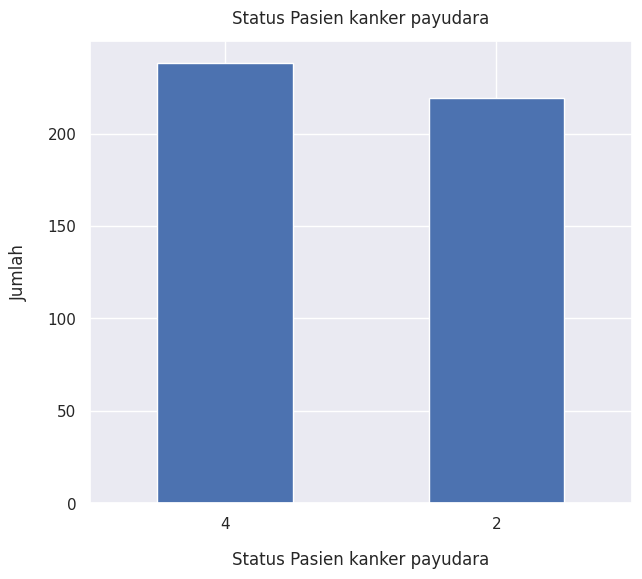

In [36]:
# Menampilkan distribusi kelas dari target
print(dataClean['Class'].value_counts())
sns.set(font_scale=1.0)
dataClean['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Pasien kanker payudara", y=1.02);

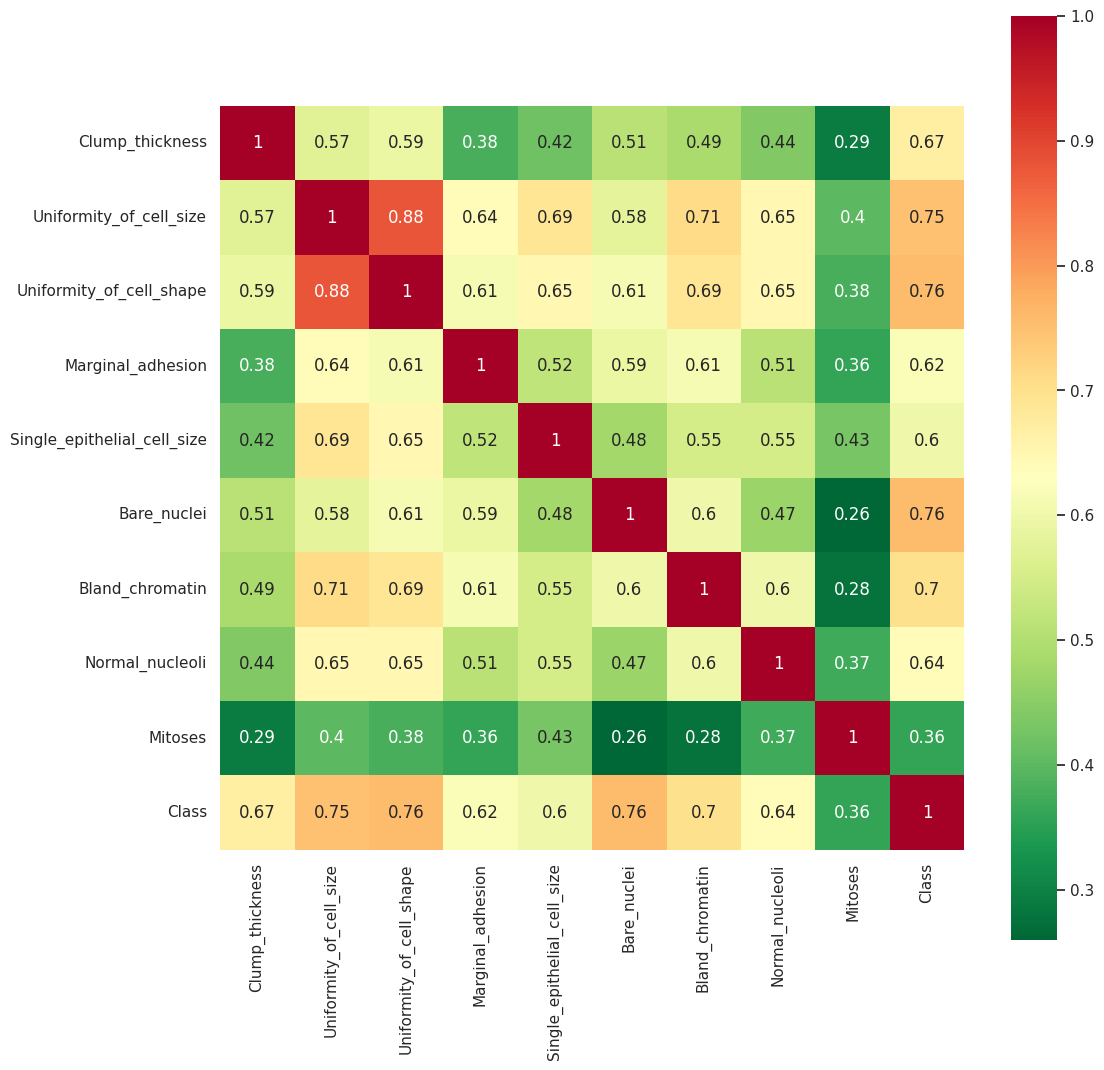

In [37]:
# Menampilkan Korelasi antar Fitur
correlation = dataClean.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

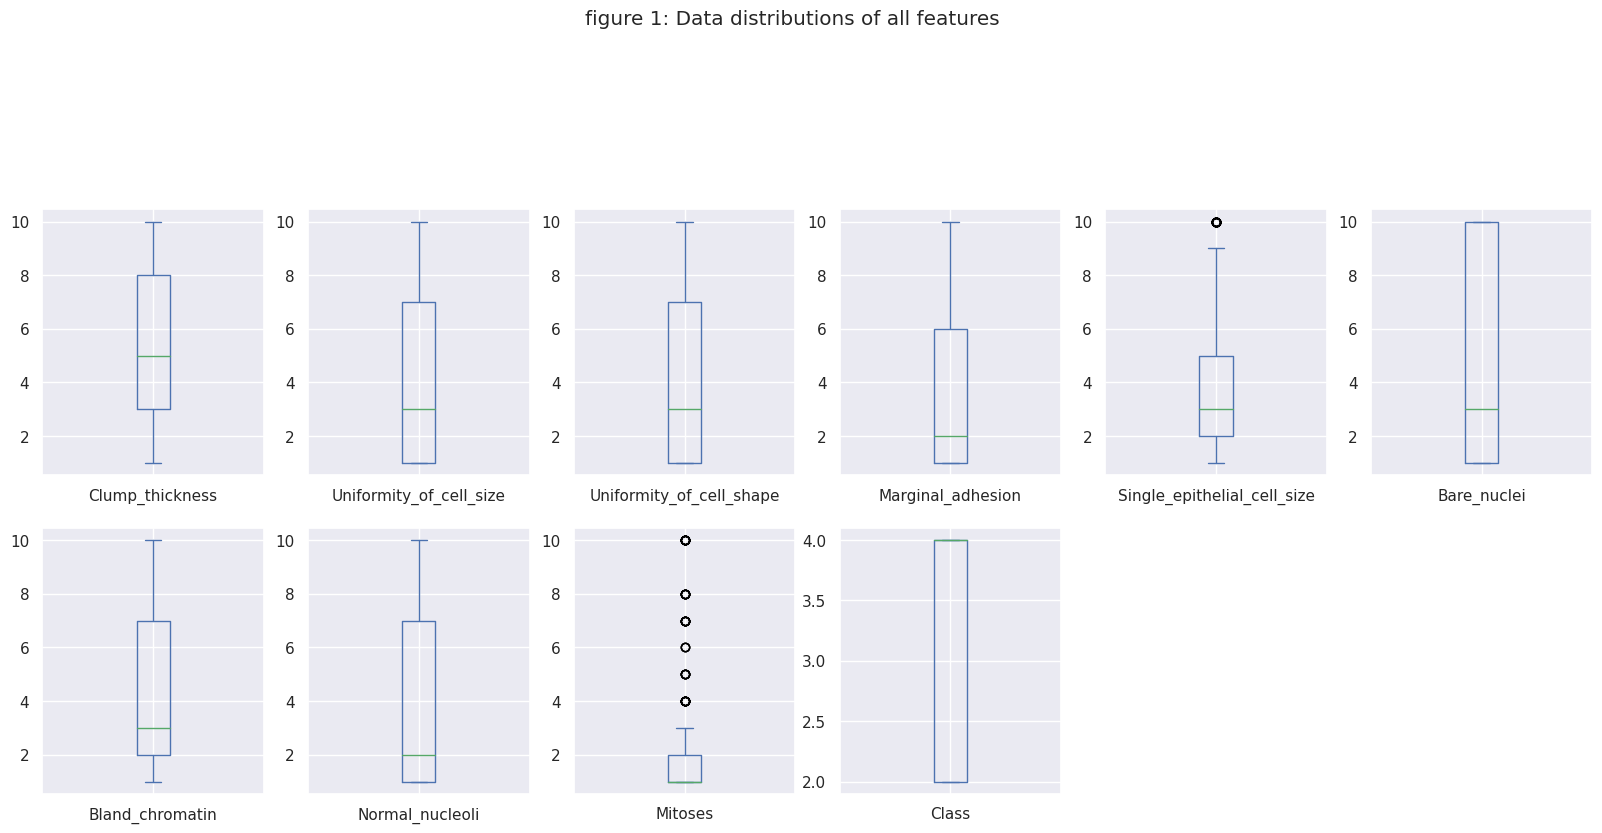

In [53]:
# Menampilkan Boxplot untuk melihat adanya Outlayer
dataClean.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [54]:
#menampilkan deskripsi data yang sudah dibersihkan
dataClean.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,5.367615,4.216630,4.277899,3.726477,3.868709,4.739606,4.196937,3.840263,1.897155,3.041575
std,2.861665,3.240219,3.123098,3.157701,2.449545,3.878645,2.645037,3.392244,2.054182,1.000230
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [55]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              457 non-null    int64
 1   Uniformity_of_cell_size      457 non-null    int64
 2   Uniformity_of_cell_shape     457 non-null    int64
 3   Marginal_adhesion            457 non-null    int64
 4   Single_epithelial_cell_size  457 non-null    int64
 5   Bare_nuclei                  457 non-null    int64
 6   Bland_chromatin              457 non-null    int64
 7   Normal_nucleoli              457 non-null    int64
 8   Mitoses                      457 non-null    int64
 9   Class                        457 non-null    int64
dtypes: int64(10)
memory usage: 39.3 KB


In [56]:
dataClean

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


###Essay 3
Deskripsikan Temuan Anda disini
Fitur mitoses memiliki beberapa outlier.
Rentang nilai antar fitur tidak besar, karena skala datanya sudah seragam yakni 1 - 10

## 7) Menentukan Label Data <a class="anchor" id="h7"></a>

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_norm = dataClean.drop("Class",axis=1).values
y = dataClean['Class']

In [60]:
# perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

## 8) Membangun Model <a class="anchor" id="h8"></a>

In [61]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [62]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb .fit(X_train, y_train)

GaussianNB()

In [63]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt .fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf .fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9) Mengevaluasi Hasil Pemodelan <a class="anchor" id="h9"></a>

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [66]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [67]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model:
Accuracy: 0.957
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.94      0.96        70
           4       0.94      0.97      0.96        68

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [69]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.957, 'recall': 0.957, 'F1 score': 0.957, 'Precision score': 0.957}


In [70]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decission Tree model
print("\nDecission Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decission Tree Model:
Accuracy: 0.913
Classification Report:
              precision    recall  f1-score   support

           2       0.89      0.94      0.92        70
           4       0.94      0.88      0.91        68

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



In [71]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.913, 'recall': 0.913, 'F1 score': 0.913, 'Precision score': 0.914}


In [72]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.96      0.95        70
           4       0.96      0.94      0.95        68

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [73]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.949}


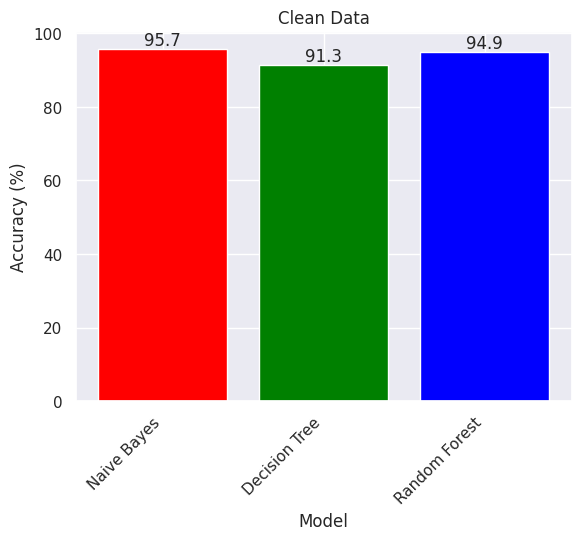

In [74]:
model_comp = pd.DataFrame({'Model': ['Naive Bayes','Decision Tree','Random Forest'], 'Accuracy': [accuracy_nb*100,
                    accuracy_dt*100,accuracy_rf*100]})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Clean Data')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

###Essay 4
Deskripsikan Temuan Anda disini:
Berdasarkan hasil eksperimen di atas, dapat disimpulkan jika Naive Bayes merupakan model terbaik karena memiliki nilai akurasi tertinggi sebesar 95.7%

## 10) Optimasi Model Klasifikasi <a class="anchor" id="h10"></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


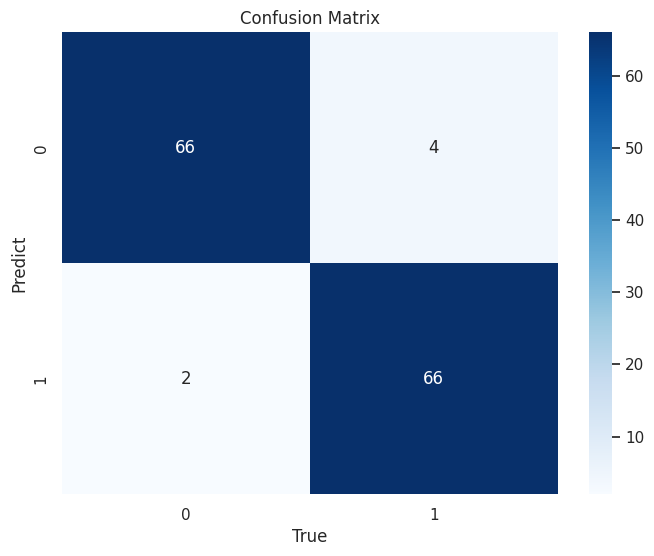

In [78]:
#nilai confusion matrix untuk model dengan akurasi tertinggi

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [86]:
columns_to_drop = ['Mitoses', 'Class']
X_selected= dataClean.drop(columns_to_drop, axis=1).values
y = dataClean['Class']

In [87]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [88]:
selected_classifier_nb = GaussianNB()
selected_classifier_nb.fit(X_train_selected, y_train_selected)

GaussianNB()

In [89]:
y_pred_nb_selected = selected_classifier_nb.predict(X_test_selected)

# Evaluate the optimize model
print("\n<fix_me> Model:")
accuracy_nb_selected = round(accuracy_score(y_test_selected, y_pred_nb_selected),3)
print("Accuracy:",accuracy_nb_selected)
print("Classification Report:")
print(classification_report(y_test_selected, y_pred_nb_selected))


<fix_me> Model:
Accuracy: 0.964
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.96        70
           4       0.96      0.97      0.96        68

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [90]:
evaluation(y_test_selected,y_pred_nb_selected)

{'accuracy': 0.964, 'recall': 0.964, 'F1 score': 0.964, 'Precision score': 0.964}


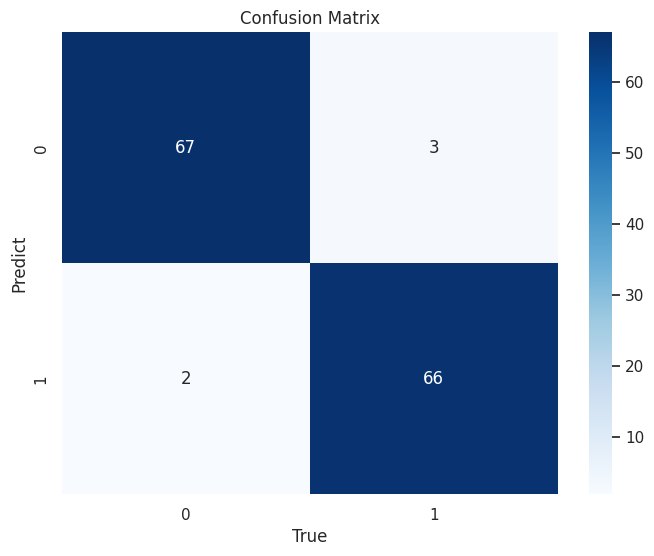

In [91]:
cm = confusion_matrix(y_test, y_pred_nb_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

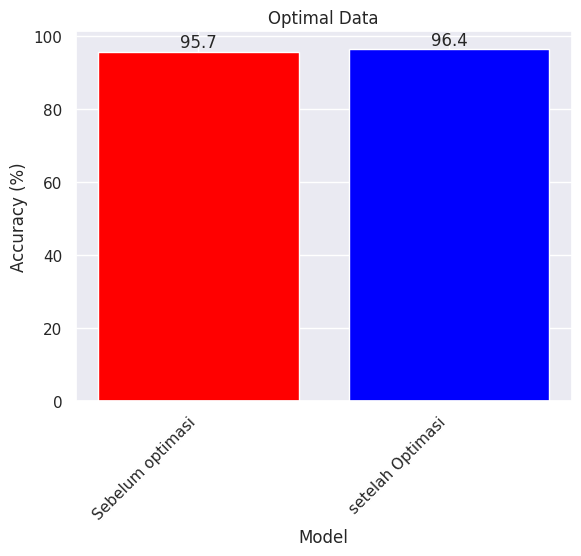

In [92]:
model_comp = pd.DataFrame({'Model': ['Sebelum optimasi','setelah Optimasi'], 'Accuracy': [accuracy_nb*100,
                    accuracy_nb_selected*100]})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Optimal Data')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

###Essay 5
Deskripsikan Temuan Anda disini:
Jadi dilakukan feature selection. Fitur yang memiliki korelasi paling rendah dengan fitur Class, yakni Mitoses di drop. Hasilnya, Akurasi meningkat menjadi 96.4%